# Time-warped PCA analysis
*Nhat Le, November 2017*

In [1]:
import twpca
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Synthetic data

### Shifted Gaussians

In [16]:
def gauss_fun(t, t0):
    '''Gaussian function centered at t0'''
    return np.exp(-(t - t0)**2)

gauss_fun_vec = np.vectorize(gauss_fun)

In [73]:
np.random.randn

In [83]:
#t = np.arange(-15, 15, 0.1)
t = np.linspace(-5, 5, 150)
np.random.seed(1235)
sig = gauss_fun_vec(t, 0)
nsamples = 100
#jitters = np.random.normal(scale=1, size=nsamples)
jitters = np.random.randn(nsamples)
sort_jitters = np.sort(jitters)

array = [gauss_fun(t, t0) for t0 in sort_jitters]
all_obs = np.vstack(array)


In [84]:
model_gauss, recons_gauss, warp_gauss = run_twpca(all_obs, 1)

100%|█████████████████████████████████████| 1000/1000 [00:07<00:00, 142.43it/s]


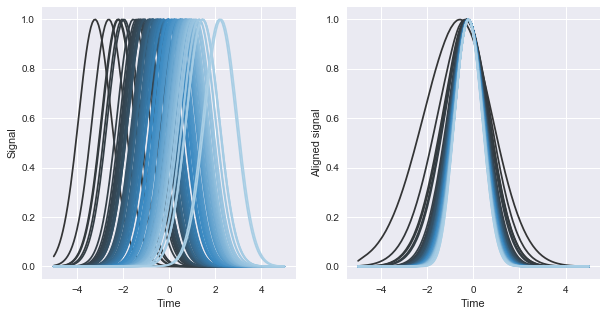

In [89]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
palette_fig1 = sns.color_palette('Blues_d', nsamples)

for i in range(nsamples):
    ax[0].plot(t, all_obs[i,:], color=palette_fig1[i]);
    ax[1].plot(t, recons_gauss[i,:,0], color=palette_fig1[i]);
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Signal')
    
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Aligned signal')
plt.savefig('twpca_gaussians_100_171101.pdf')

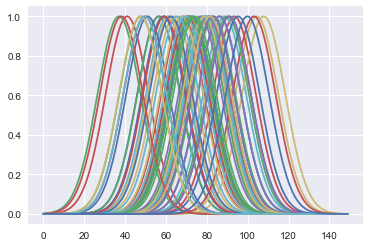

In [10]:
data_gauss = twpca.datasets.jittered_neuron(noise=0)
plt.plot(data_gauss[2][:,:,0].T);

In [9]:
def run_twpca(data, ncomp):
    '''Wrapper for running twPCA.
    Returns: model: the model twPCA returns
    recons: the aligned data
    warp: the warp factor'''
    model = twpca.TWPCA(n_components=ncomp)
    model.fit(data)
    recons = model.transform()
    warp = model.params['warp']
    return model, recons, warp

In [12]:
model_gauss, recons_gauss, warp_gauss = run_twpca(data_gauss[2], 1)

100%|█████████████████████████████████████| 1000/1000 [00:03<00:00, 278.23it/s]


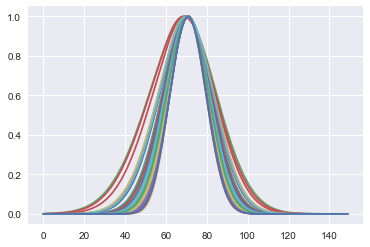

In [14]:
plt.plot(recons_gauss[:,:,0].T);

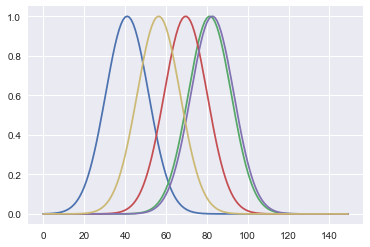

In [294]:
plt.plot(data_s[2][2:7,:,0].T);

In [277]:
model_s = twpca.TWPCA(n_components=1)
model_s.fit(data_s[2][:7,:,0])
recons_s = model_s.transform()

100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 950.43it/s]


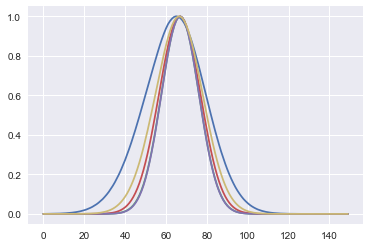

In [295]:
plt.plot(recons_s[2:7,:,0].T);

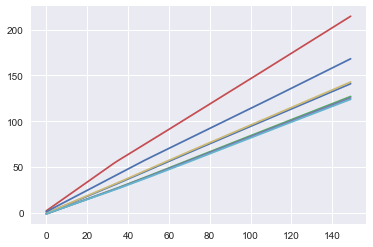

In [297]:
warp = model_s.params['warp']
plt.plot(warp.T);

In [2]:
# Read in the neural data
short_psth = np.genfromtxt('./psth_short_all_neurons_171027.csv', delimiter=',')
long_psth = np.genfromtxt('./psth_long_all_neurons_171027.csv', delimiter=',')

t_points_short = 7
t_points_long = 9
n_neurons = 105

In [3]:
# Reshape the short and long raw data into tensors
reshaped_short_psth = np.reshape(short_psth, (n_neurons, t_points_short, -1))
reshaped_long_psth = np.reshape(long_psth, (n_neurons, t_points_long, -1))
duration_short = reshaped_short_psth.shape[2]
duration_long = reshaped_long_psth.shape[2]

In [4]:
# Combine short and long trials into one tensor
reshaped_short_pad = np.lib.pad(reshaped_short_psth, ((0,0), (0,0), (0,46-25)), 
                                'constant', constant_values=(0, 0))
reshaped_all_pad = np.concatenate((reshaped_short_pad, reshaped_long_psth), axis=1)

# Swap axes to feed in twpca
swapped_all = np.swapaxes(reshaped_all_pad, 0, 2)
swapped_all = np.swapaxes(swapped_all, 0, 1)

In [5]:
# Define palette used in plotting
palette_blue = sns.palettes.color_palette('Blues', t_points_short)
palette_red = sns.palettes.color_palette('Reds', t_points_long)

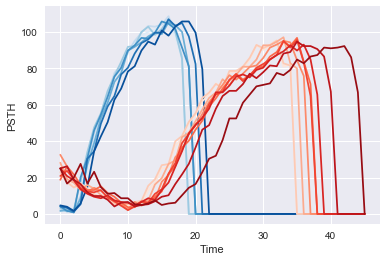

In [6]:
neuron1 = swapped_all[:,:,11]
for i in range(t_points_short):
    plt.plot(neuron1[i, :].T, color=palette_blue[i]);
    
for i in range(t_points_long):
    plt.plot(neuron1[t_points_short + i, :].T, color=palette_red[i]);    

plt.xlabel('Time')
plt.ylabel('PSTH')

In [8]:
swapped.shape

(7, 25, 105)

In [54]:
plt.plot(reshaped_short_psth[:,:19,3].T);

IndexError: index 3 is out of bounds for axis 2 with size 1

In [56]:
swapped = np.swapaxes(reshaped_short_psth, 0, 2)
swapped = np.swapaxes(swapped, 0, 1)
swapped = swapped[:,:19,12]
swapped = swapped[:,:,np.newaxis]

model = twpca.TWPCA(n_components=1)
model.fit(swapped)
aligned = model.transform()

100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 1263.87it/s]


In [34]:
swapped.shape

(7, 19, 105)

In [37]:
swapped_long.shape

(9, 46, 105)

In [36]:
swapped_long = np.swapaxes(reshaped_long_psth, 0, 2)
swapped_long = np.swapaxes(swapped_long, 0, 1)
model_long = twpca.TWPCA(n_components=1)
model_long.fit(swapped_long)
aligned_long = model_long.transform()

100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 662.84it/s]


In [9]:
model_all = twpca.TWPCA(n_components=1)
model_all.fit(swapped_all)
aligned_all = model_all.transform()

100%|█████████████████████████████████████| 1000/1000 [00:02<00:00, 370.44it/s]


In [45]:
V = model.params['time']
U = model.params['neuron']


In [58]:
model.transform??

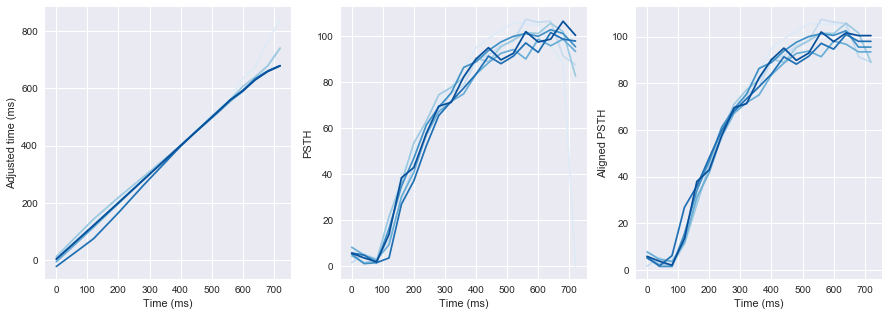

In [57]:
# Plot warp factors and alignment
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
a = model.params['warp']
neuron_id = 0
before_align = swapped[:,:,neuron_id]
after_align = aligned[:,:,neuron_id]
timestamps = np.arange(a.shape[1]) * 40



for i in range(7):
    ax[0].plot(timestamps, a[i,:] * 40, color=palette_blue[i]) 
    ax[1].plot(timestamps, before_align[i,:], color=palette_blue[i]); 
    ax[2].plot(timestamps, after_align[i,:], color=palette_blue[i]);
ax[0].set_xlabel('Time (ms)')
ax[1].set_xlabel('Time (ms)')
ax[2].set_xlabel('Time (ms)')

ax[0].set_ylabel('Adjusted time (ms)')
ax[1].set_ylabel('PSTH')
ax[2].set_ylabel('Aligned PSTH')
plt.savefig('short_twpca_alignment.pdf')

    
    
    

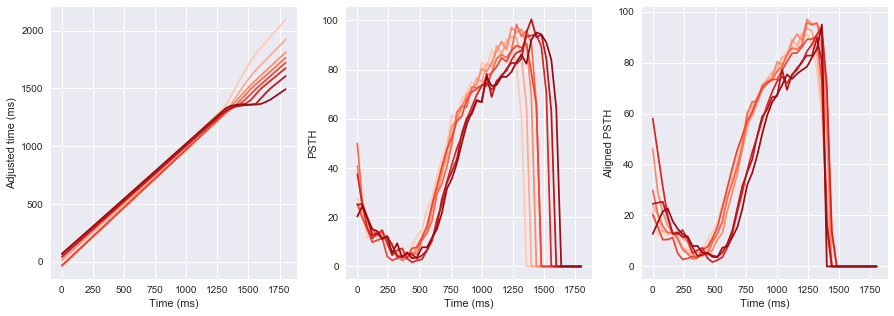

In [23]:
# Plot warp factors and alignment
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
a = model_long.params['warp']
neuron_id = 12
before_align = swapped_long[:,:,neuron_id]
after_align = aligned_long[:,:,neuron_id]
timestamps = np.arange(a.shape[1]) * 40

for i in range(9):
    ax[0].plot(timestamps, a[i,:] * 40, color=palette_red[i]) 
    ax[1].plot(timestamps, before_align[i,:], color=palette_red[i]);    
    ax[2].plot(timestamps, after_align[i,:], color=palette_red[i]);
    
ax[0].set_xlabel('Time (ms)')
ax[1].set_xlabel('Time (ms)')
ax[2].set_xlabel('Time (ms)')

ax[0].set_ylabel('Adjusted time (ms)')
ax[1].set_ylabel('PSTH')
ax[2].set_ylabel('Aligned PSTH')

plt.savefig('long_twpca_alignment.pdf')


IndexError: list index out of range

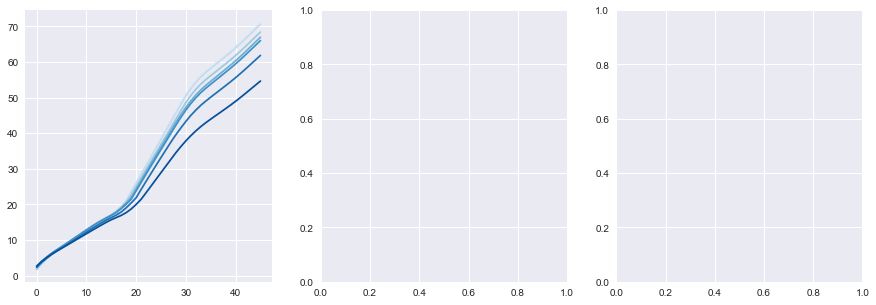

In [12]:
# Plot warp factors and alignment
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
a = model_all.params['warp']
neuron_id = 3

for i in range(16):
    ax[0].plot(a[i,:], color=palette_blue[i]) 

before_align = swapped_all[:,:,neuron_id]
for i in range(16):
    ax[1].plot(before_align[i,:], color=palette_blue[i]);    
    
after_align = aligned_all[:,:,neuron_id]
for i in range(16):
    ax[2].plot(after_align[i,:], color=palette_blue[i]);

In [ ]:
swapped_single.shape

In [ ]:
model_single

Effort to align short and long trials... 

In [ ]:
model_single.params['warp'].shape

In [13]:
# Extract only one trial in each short/long condition
swapped_single = swapped_all[:,:,4]

# Tried: normalizing by maximum activity
#swapped_single = (swapped_single.T / np.max(swapped_single, axis=1)).T
swapped_single = np.lib.pad(swapped_single, ((0, 0), (10, 10)), 'constant', constant_values=0)

model_single = twpca.TWPCA(n_components=1)
model_single.fit(swapped_single)
aligned_single = model_single.transform()

100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 730.74it/s]


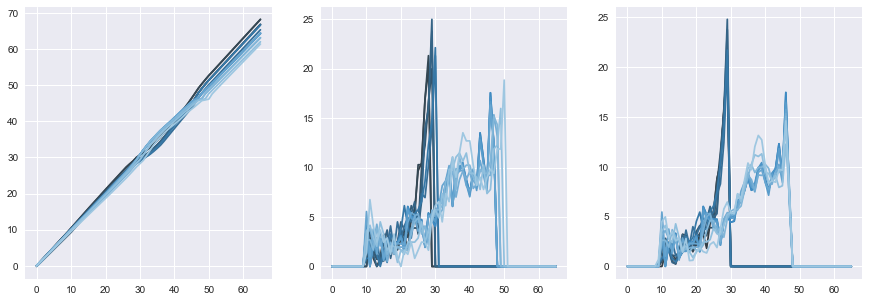

In [14]:
# Plot warp factors and alignment
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
warp = model_single.params['warp']
palette_blues = sns.palettes.color_palette('Blues_d', 16)
neuron_id = 3

for i in range(warp.shape[0]):
    ax[0].plot(warp[i,:], color=palette_blues[i]) 
    ax[1].plot(swapped_single[i,:], color=palette_blues[i]);
    ax[2].plot(aligned_single[i,:], color=palette_blues[i]);

In [15]:
model_single.params

{'neuron': array([[-2.25002646]], dtype=float32),
 'time': array([[  1.26275016e-04],
        [  1.11957925e-04],
        [  8.38624255e-05],
        [  5.49379765e-05],
        [  3.52875504e-05],
        [  7.27600418e-05],
        [ -2.08687794e-04],
        [  2.12942809e-03],
        [ -1.53889973e-02],
        [  1.09075122e-01],
        [ -1.01818335e+00],
        [ -8.26996088e-01],
        [ -9.12702978e-01],
        [ -7.80263841e-01],
        [ -8.89574826e-01],
        [ -6.68805540e-01],
        [ -8.55806351e-01],
        [ -9.02849078e-01],
        [ -8.37370634e-01],
        [ -8.56919765e-01],
        [ -9.78306711e-01],
        [ -9.37184989e-01],
        [ -1.11211395e+00],
        [ -1.11581576e+00],
        [ -1.15093434e+00],
        [ -1.14543140e+00],
        [ -1.18681407e+00],
        [ -1.18346465e+00],
        [ -1.30529904e+00],
        [ -1.35941458e+00],
        [ -7.30289638e-01],
        [ -8.52163553e-01],
        [ -1.06205249e+00],
        [ -1.03760

In [ ]:
warp_lst = []
for i in range(150):
    # Extract only one trial in each short/long condition
    swapped_single = swapped_all[:t_points_short,:,i]

    print('Doing neuron #', i, '...')

    model_single = twpca.TWPCA(n_components=1)
    model_single.fit(swapped_single)
    warp_lst.append(model_single.params['warp'])
    #aligned_single = model_single.transform()

In [ ]:
warp_lst_long = []
for i in range(150):
    # Extract only one trial in each short/long condition
    swapped_single = swapped_all[t_points_short:,:,i]

    print('Doing neuron #', i, '...')

    model_single = twpca.TWPCA(n_components=1)
    model_single.fit(swapped_single)
    warp_lst_long.append(model_single.params['warp'])
    #aligned_single = model_single.transform()

Doing neuron # 0 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 721.36it/s]


Doing neuron # 1 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 644.68it/s]


Doing neuron # 2 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 681.75it/s]


Doing neuron # 3 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 705.37it/s]


Doing neuron # 4 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 607.27it/s]


Doing neuron # 5 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 657.54it/s]


Doing neuron # 6 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 668.53it/s]


Doing neuron # 7 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 692.07it/s]


Doing neuron # 8 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 645.18it/s]


Doing neuron # 9 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 574.25it/s]


Doing neuron # 10 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 681.17it/s]


Doing neuron # 11 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 679.30it/s]


Doing neuron # 12 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 665.11it/s]


Doing neuron # 13 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 673.85it/s]


Doing neuron # 14 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 660.70it/s]


Doing neuron # 15 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 638.71it/s]


Doing neuron # 16 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 647.13it/s]


Doing neuron # 17 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 638.99it/s]


Doing neuron # 18 ...


100%|█████████████████████████████████████| 1000/1000 [00:02<00:00, 459.65it/s]


Doing neuron # 19 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 620.93it/s]


Doing neuron # 20 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 589.44it/s]


Doing neuron # 21 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 591.34it/s]


Doing neuron # 22 ...


100%|█████████████████████████████████████| 1000/1000 [00:02<00:00, 427.58it/s]


Doing neuron # 23 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 591.19it/s]


Doing neuron # 24 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 506.14it/s]


Doing neuron # 25 ...


100%|█████████████████████████████████████| 1000/1000 [00:07<00:00, 134.75it/s]


Doing neuron # 26 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 595.23it/s]


Doing neuron # 27 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 540.54it/s]


Doing neuron # 28 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 578.46it/s]


Doing neuron # 29 ...


100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 550.33it/s]


Doing neuron # 30 ...


100%|█████████████████████████████████████| 1000/1000 [00:02<00:00, 495.24it/s]


Doing neuron # 31 ...


100%|█████████████████████████████████████| 1000/1000 [00:06<00:00, 149.37it/s]


Doing neuron # 32 ...


100%|█████████████████████████████████████| 1000/1000 [00:04<00:00, 228.60it/s]


Doing neuron # 33 ...


100%|█████████████████████████████████████| 1000/1000 [00:02<00:00, 405.04it/s]


Doing neuron # 34 ...


100%|██████████████████████████████████████| 1000/1000 [00:14<00:00, 67.08it/s]


Doing neuron # 35 ...


100%|█████████████████████████████████████| 1000/1000 [00:08<00:00, 114.32it/s]


Doing neuron # 36 ...


100%|█████████████████████████████████████| 1000/1000 [00:06<00:00, 164.65it/s]


Doing neuron # 37 ...


100%|██████████████████████████████████████| 1000/1000 [00:10<00:00, 95.23it/s]


Doing neuron # 38 ...


100%|█████████████████████████████████████| 1000/1000 [00:08<00:00, 121.84it/s]


Doing neuron # 39 ...


100%|█████████████████████████████████████| 1000/1000 [00:08<00:00, 116.82it/s]


Doing neuron # 40 ...


100%|██████████████████████████████████████| 1000/1000 [00:10<00:00, 91.18it/s]


Doing neuron # 41 ...


100%|██████████████████████████████████████| 1000/1000 [00:04<00:00, 27.93it/s]


Doing neuron # 42 ...


100%|█████████████████████████████████████| 1000/1000 [00:04<00:00, 222.57it/s]


Doing neuron # 43 ...


100%|██████████████████████████████████████| 1000/1000 [00:11<00:00, 83.54it/s]


Doing neuron # 44 ...


100%|█████████████████████████████████████| 1000/1000 [00:04<00:00, 218.94it/s]


Doing neuron # 45 ...


100%|█████████████████████████████████████| 1000/1000 [00:06<00:00, 156.05it/s]


Doing neuron # 46 ...


100%|██████████████████████████████████████| 1000/1000 [00:10<00:00, 92.98it/s]


Doing neuron # 47 ...


100%|█████████████████████████████████████| 1000/1000 [00:08<00:00, 123.03it/s]


Doing neuron # 48 ...


100%|█████████████████████████████████████| 1000/1000 [00:06<00:00, 145.33it/s]


Doing neuron # 49 ...


100%|█████████████████████████████████████| 1000/1000 [00:09<00:00, 105.31it/s]


Doing neuron # 50 ...


100%|██████████████████████████████████████| 1000/1000 [00:10<00:00, 96.90it/s]


Doing neuron # 51 ...


100%|█████████████████████████████████████| 1000/1000 [00:07<00:00, 133.49it/s]


Doing neuron # 52 ...


100%|█████████████████████████████████████| 1000/1000 [00:09<00:00, 108.95it/s]


Doing neuron # 53 ...


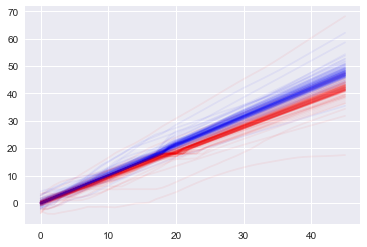

In [25]:
for warp in warp_lst:
    plt.plot(warp[0,:], 'b', alpha=0.05)
    plt.plot(warp[6,:], 'r', alpha=0.05)

In [38]:
mean_warp = np.zeros_like(warp_lst[0])
for warp in warp_lst:
    mean_warp += warp / len(warp_lst)

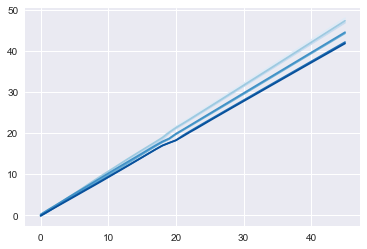

In [42]:
with sns.color_palette('Blues', 7):
    plt.plot(mean_warp.T);

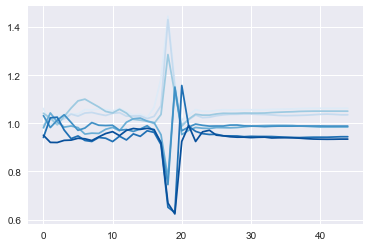

In [43]:
with sns.color_palette('Blues', 7):
    plt.plot(np.diff(mean_warp).T)

## Generated data 

In [152]:
gen_dat_vec(time[800:900] + 2.0)

array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,
        0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,
        0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ,  0.52,
        0.54,  0.56,  0.58,  0.6 ,  0.62,  0.64,  0.66,  0.68,  0.7 ,
        0.72,  0.74,  0.76,  0.78,  0.8 ,  0.82,  0.84,  0.86,  0.88,
        0.9 ,  0.92,  0.94,  0.96,  0.98,  1.  ,  1.02,  1.04,  1.06,
        1.08,  1.1 ,  1.12,  1.14,  1.16,  1.18,  1.2 ,  1.22,  1.24,
        1.26,  1.28,  1.3 ,  1.32,  1.34,  1.36,  1.38,  1.4 ,  1.42,
        1.44,  1.46,  1.48,  1.5 ,  1.52,  1.54,  1.56,  1.58,  1.6 ,
        1.62,  1.64,  1.66,  1.68,  1.7 ,  1.72,  1.74,  1.76,  1.78,
        1.8 ,  1.82,  1.84,  1.86,  1.88,  1.9 ,  1.92,  1.94,  1.96,  1.98])

In [525]:
def gen_dat(time):
    noise = 0 #np.random.normal(scale=0.05)
    if time < 0:
        return noise
    elif time < 8:
        return 2 * time + noise
    else:
        return max(16 - 2 * (time - 8) + noise, noise);
    
gen_dat_vec = np.vectorize(gen_dat, otypes=[np.float])

In [526]:
def lin_ramp(tau):
    if t < 0:
        return noise
    elif t < 8:
        return 2 * t
    else:
        return np.max(16 - 2 * (t - 8), 0);
lin_ramp_vec = np.vectorize(lin_ramp)

In [527]:
sigs.dtype

dtype('float64')

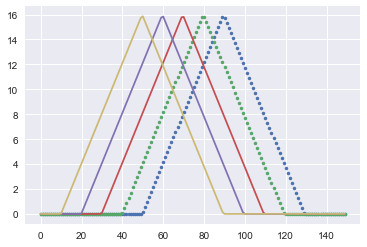

In [532]:
#time = np.arange(-10, 20, 0.3)
time = np.linspace(-10, 20, 150)
sig1 = gen_dat_vec(time)
sig2 = gen_dat_vec(time + 2)
sig3 = gen_dat_vec(time + 4)
sig4 = gen_dat_vec(time + 6)
sig5 = gen_dat_vec(time + 8)

plt.plot(sig1, '.')
plt.plot(sig2, '.')
plt.plot(sig3)
plt.plot(sig4)
plt.plot(sig5)

100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 692.32it/s]


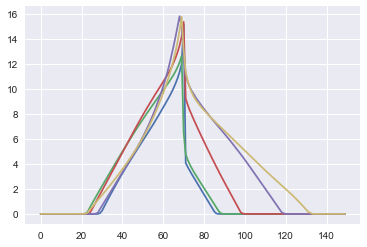

In [533]:
sigs = np.array([sig1, sig2, sig3, sig4, sig5])
model_sig = twpca.TWPCA(n_components=1)
model_sig.fit(sigs[:,:,np.newaxis])
recons = model_sig.transform()
plt.plot(recons[:,:,0].T);

In [547]:
shifts[2]

1.2825734247630949

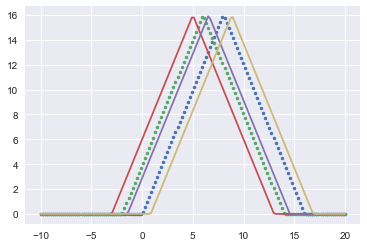

In [548]:
time = np.linspace(-10, 20, 150)
sig1 = gen_dat_vec(time)
sig2 = gen_dat_vec(time + 2)
sig3 = gen_dat_vec(time + 3)
sig4 = gen_dat_vec(time + shifts[3])
sig5 = gen_dat_vec(time + shifts[4])

plt.plot(time,sig1, '.')
plt.plot(time,sig2, '.')
plt.plot(time,sig3)
plt.plot(time,sig4)
plt.plot(time,sig5)

100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 774.05it/s]


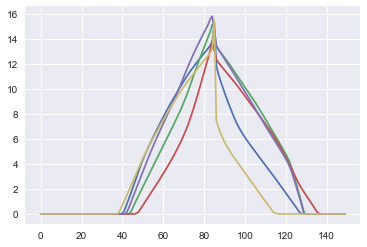

In [549]:
sigs = np.array([sig1, sig2, sig3, sig4, sig5])
model_sig = twpca.TWPCA(n_components=1)
model_sig.fit(sigs[:,:,np.newaxis])
recons = model_sig.transform()
plt.plot(recons[:,:,0].T);

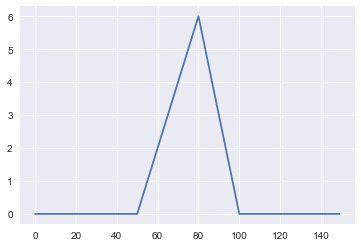

In [385]:
t = np.arange(0,15,0.1)
interval2 = (t >= 8).astype('float') * (t < 10).astype('float')
interval1 = (t > 5).astype('float') * (t < 8).astype('float')
resp = (2 * t - 10) * interval1 + (-3 * t + 30) * interval2
plt.plot(resp)

In [513]:
def double(tau):
    return (t - tau) * 2.0

def ramp(tau, t):
    t_trans = t - tau
    interval1 = (t_trans > 5).astype('float') * (t_trans < 8).astype('float')
    interval2 = (t_trans >= 8).astype('float') * (t_trans < 10).astype('float')
    return (2 * t_trans - 10) * interval1 + (-3 * t_trans + 30) * interval2

def ramp2(tau, t):
    t_trans = t - tau
    interval1 = (t_trans > 0).astype('float') * (t_trans < 8).astype('float')
    interval2 = (t_trans >= 8).astype('float') * (t_trans < 16).astype('float')
    return (2 * t_trans) * interval1 + (-2 * t_trans + 32) * interval2

In [444]:
data_lin = my_jittered_neuron(feature=ramp, n_trial=100)
#plt.plot(data_lin[2][:5,:,:].T, '.');

ValueError: operands could not be broadcast together with shapes (100,) (100,150) 

In [436]:
t=1

In [401]:
model_s = twpca.TWPCA(n_components=1)
model_s.fit(data_lin[2][:5,:,:])
recons_s = model_s.transform()

100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 900.77it/s]


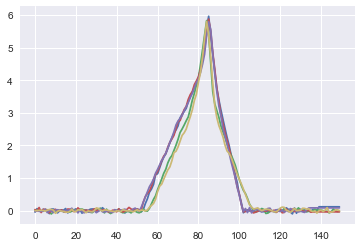

In [402]:
plt.plot(recons_s[:,:,0].T);

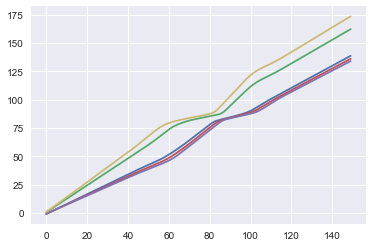

In [403]:
warp = model_s.params['warp']
plt.plot(warp.T);

In [404]:
warp.shape

(5, 150)

In [518]:
def my_jittered_neuron(t=None, feature=None, n_trial=61, jitter=1.0, gain=0.0, noise=0.05, seed=1234):
    """Generates a synthetic dataset of a single neuron with a jittered firing pattern.
    Parameters
    ----------
    t : array_like
        vector of within-trial timepoints
    feature : function
        produces a jittered instance of the feature (takes time shift as an input)
    n_trial : int
        number of trials
    jitter : float
        standard deviation of trial-to-trial shifts
    gain : float
        standard deviation of trial-to-trial changes in amplitude
    noise : float
        scale of additive gaussian noise
    seed : int
        seed for the random number generator
    Returns
    -------
    canonical_feature : array_like
        vector of firing rates on a trial with zero jitter
    aligned_data : array_like
        n_trial x n_time x 1 array of de-jittered noisy data
    jittered_data : array_like
        n_trial x n_time x 1 array of firing rates with jitter and noise
    """

    # default time base
    if t is None:
        t = np.linspace(-5, 20, 150)

    # default feature
    if feature is None:
        feature = lambda tau: np.exp(-(t-tau)**2)

    # noise matrix
    np.random.seed(seed)
    noise = noise*np.random.randn(n_trial, len(t))

    # generate jittered data
    gains = 1.0 + gain*np.random.randn(n_trial)
    shifts = jitter*np.random.randn(n_trial)
        
    jittered_data = np.array([g*feature(s, t) for g, s in zip(gains, shifts)]) + noise

    # generate aligned data
    aligned_data = np.array([g*feature(0, t) for g in gains]) + noise

    return feature(0, t), np.atleast_3d(aligned_data), np.atleast_3d(jittered_data), shifts, t

In [67]:
twpca.datasets.jittered_neuron??

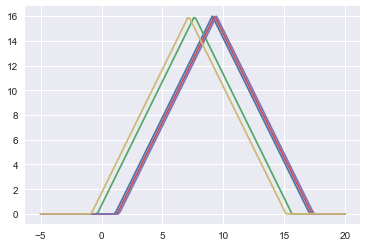

In [519]:
_,_,data,shifts,t = my_jittered_neuron(feature=ramp2, n_trial=100, noise=0)
plt.plot(t, data[:5,:,0].T);

100%|█████████████████████████████████████| 1000/1000 [00:01<00:00, 742.76it/s]


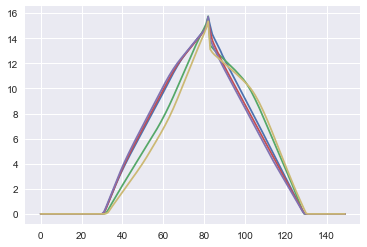

In [520]:
model_s = twpca.TWPCA(n_components=1)
model_s.fit(data[:5,:,0])
recons_s = model_s.transform()
plt.plot(recons_s[:,:,0].T);